In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('IPN31152N.csv',index_col='DATE',parse_dates=True)

In [3]:
data.columns=['Production']

In [4]:
data.head()

,Production
DATE,
1972-01-01,60.1519
1972-02-01,67.2727
1972-03-01,74.4700
1972-04-01,78.3594
1972-05-01,85.0321


<Axes: xlabel='DATE'>

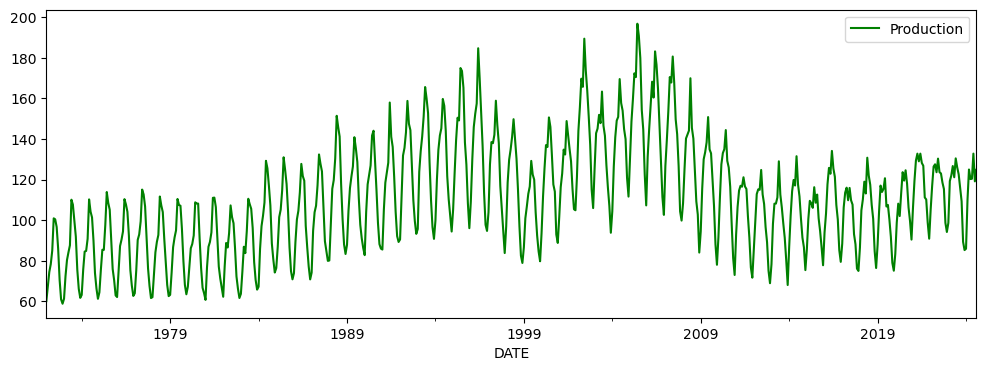

In [5]:
data.plot(c='g',figsize=(12,4))

In [6]:
len(data)

632

In [7]:
#Splitting Data
train_data=data.iloc[:-24]
test_data=data.iloc[-24:]

In [8]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train_data=scaler.fit_transform(train_data)
scaled_test_data=scaler.transform(test_data)

In [9]:
#Generating Batches for trainig the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
Train_gen=TimeseriesGenerator(scaled_train_data,scaled_train_data,length=18,batch_size=1)
valid_gen=TimeseriesGenerator(scaled_test_data,scaled_test_data,length=18,batch_size=1)

In [10]:
#Creating Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Input
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model=Sequential()
model.add(Input(shape=(18,1)))
model.add(LSTM(units=128,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
model.fit(Train_gen,epochs=20,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0362 - val_loss: 0.0117
Epoch 2/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0138 - val_loss: 0.0068
Epoch 3/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0061 - val_loss: 0.0078
Epoch 4/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 5/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 6/20
590/590 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0032 - val_loss: 0.0035


In [16]:
losses=pd.DataFrame(model.history.history)

<Axes: >

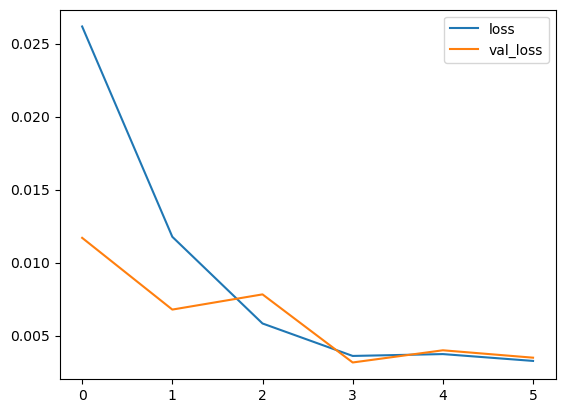

In [17]:
losses.plot()

In [18]:
predictions=[]
test=scaled_train_data[-18:].reshape(1,18,1)
for i in range(24):
    pred=model.predict(test)
    predictions.append(pred[0])
    test=np.append(test[:,1:,:],[pred],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [19]:
predictions=scaler.inverse_transform(predictions)

In [20]:
test_data['LSTM Predictions']=predictions

<Axes: xlabel='DATE'>

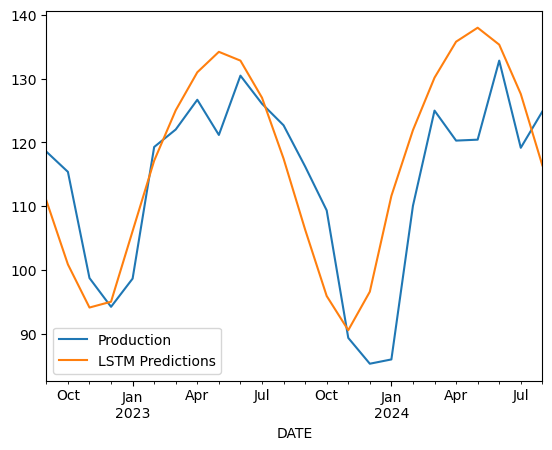

In [21]:
test_data.plot()

In [22]:
#Forecasting
new_scaler=MinMaxScaler()
f_data=new_scaler.fit_transform(data)

In [23]:
f_gen=TimeseriesGenerator(f_data,f_data,length=18,batch_size=1)

In [24]:
f_model=Sequential()
f_model.add(Input(shape=(18,1)))
f_model.add(LSTM(units=128,activation='relu'))
f_model.add(Dense(1))

f_model.compile(optimizer='adam',loss='mse')

In [25]:
f_model.fit(f_gen,epochs=7)

Epoch 1/7
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0308
Epoch 2/7
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0092
Epoch 3/7
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0050
Epoch 4/7
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0040
Epoch 5/7
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0030
Epoch 6/7
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0030
Epoch 7/7
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0032


In [26]:
forecast=[]
d=f_data[-18:].reshape(1,18,1)
for i in range(24):
    pred=model.predict(d)
    forecast.append(pred[0])
    d=np.append(d[:,1:,:],[pred],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [27]:
forecast = new_scaler.inverse_transform(forecast)

In [28]:
forecast_index = pd.date_range(start='2024-09-01',periods=24,freq='MS')
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

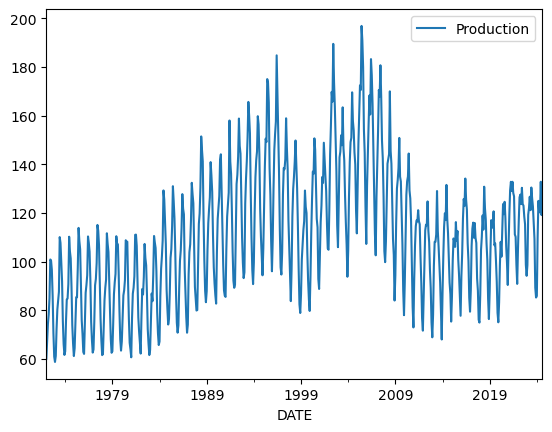

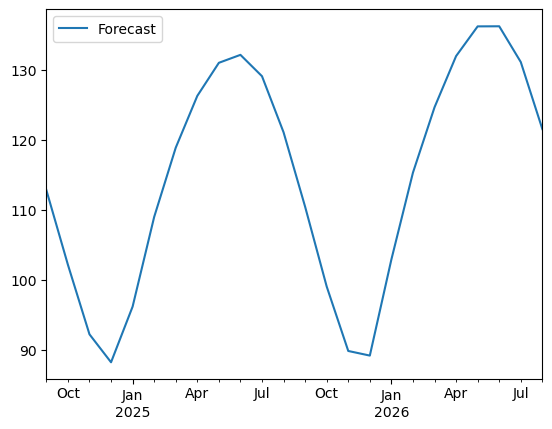

In [29]:
data.plot()
forecast_df.plot()
plt.show()

<Axes: xlabel='DATE'>

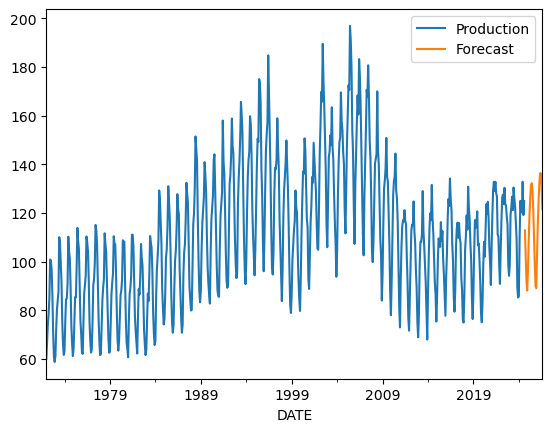

In [30]:
ax = data.plot()
forecast_df.plot(ax=ax)

(576.0, 679.0)

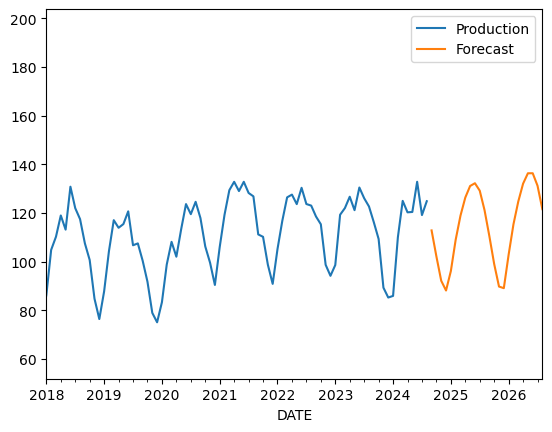

In [31]:
ax = data.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2026-08-01')

In [71]:
from sklearn.metrics import root_mean_squared_error
print(f"RMSE : {root_mean_squared_error(test_data["Production"],test_data['LSTM Predictions'])}")

RMSE : 10.232837630535796
